**2022年度 東京成徳大学 特別講座 資料**<br>
**東京工科大学コンピュータサイエンス学部**<br>
**福西広晃**

----

<span style="font-size: 250%; color: black;">Pythonによる実践的なデータ分析(株価分析)</span>

----

# 今回インストールが必要なライブラリ

## ta-libのインストール
- テクニカル指標分析ライブラリ

- Google Colaboratoryの場合<Br>
  `!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz`<br>
  `!cd ta-lib && ./configure --prefix=/usr && make && make install && cd - && pip install ta-lib`
<br>
- aconda promptで以下を実行<Br>
    `conda install -c conda-forge ta-lib`<Br>
    [参考サイト](https://anaconda.org/conda-forge/ta-lib)    

## prophetのインストール
- Facebookが開発した時系列予測ライブラリ
- Google Colaboratoryの場合<Br>
  `!pip install prophet`
<br><br>
- aconda promptで以下を実行<br>
  `conda install -c conda-forge prophet`

## pandas_datareaderのインストール
- 日経平均、NASDAQ、個別銘柄の株価データ取得ライブラリ
- Google colaboratoryの場合<br>
  初期設定でインストールされているはずだが、されていなければ以下を実行<br>
    `pip install pandas-datareader`
- Anacondaの場合<br>
    `pip install pandas-datareader`

**Google Colaboratoyrへ上記を纏めてインストール**

In [ ]:
# ta-lib
!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install && cd - && pip install ta-lib

# prophet
!pip install prophet

# pandas_datareader
!pip install pandas-datareader

# japanize-matplotlib　（グラフ日本語対応）
!pip install japanize-matplotlib

----

**Googleドライブにアクセス**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

----

# データ取得

## 日経平均の取得
- 使用ライブラリ: `pandas_datareader`
  - 第1引数：銘柄: 日経225(コード: ^NKX)
  - 第2引数：取得サイト：stooq(各種経済データを公開しているポーランドのサイト)
  - 第3引数: 開始日：2019-06-01
  - 第4引数: 終了日: 2020-05-31
- `pandas_datareader`を用いて、2019/6/1-2020/5/31までの日経平均株価データを取得
- 曜日の追加: `day_name()`を使用
- [stooqサイト](https://stooq.com/q/?s=%5Enkx)
<br><br>
- 以下では、`df_N225`のデータフレームにデータを代入するものとする

In [ ]:
# 使用するライブラリ
from   pandas_datareader import data
import pandas as pd
import datetime as dt # 日付型データ生成ライブラリ

#------------------------------------------------------------------
# 設定項目：DataReaderの引数
#------------------------------------------------------------------
code  = "^NKX"              # 銘柄コード
site  = "stooq"             # データ取得サイト
start = dt.date(2019,6,1)   # 開始(年, 月, 日) 
end   = dt.date(2020,5,31)  # 終了(年, 月, 日)　
#------------------------------------------------------------------

# 取得データをpnadasのデータフレームに挿入
# 時系列を昇順に並び替えるために`sort_index()`を付ける
df_N225 = data.DataReader(code, site, start, end).sort_index()  

# 曜日の追加
df_N225["day_name"] = df_N225.index.day_name()

display(df_N225.head(5)) # 先頭5行分データ表示
display(df_N225.tail(5)) # 末尾5行分データ表示

- Open：始値
- High：高値
- Low：安値
- Close：終値
- Volume：出来高（取引が成立した株数）

**時系列データを扱う場合はインデックス（行名）に年月日が入る(通常は0,1,…)**

## 個別銘柄の株価の取得
- [個別銘柄のコード取得](https://quote.jpx.co.jp/jpx/template/quote.cgi?F=tmp/stock_search)
  - 例: トヨタ自動車：`7203`
  - codeに代入する場合、コードの後ろに`.JP`を付ける：`7203.JP`
  <br><br>
- 以下では、`df_stock`のデータフレームにデータを代入するものとする

In [ ]:
#------------------------------------------------------------------
# 設定項目：DataReaderの引数
#------------------------------------------------------------------
code  = "7203.JP"           # 銘柄コード
site  = "stooq"             # データ取得サイト
start = dt.date(2019,6,1)   # 開始(年, 月, 日) 
end   = dt.date(2020,5,31)  # 終了(年, 月, 日)　　
#------------------------------------------------------------------

#　取得データをpnadasのデータフレームに挿入
df_stock = data.DataReader(code, site, start, end).sort_index() 

# 曜日の追加
df_stock["day_name"] = df_stock.index.day_name()

display(df_stock.head(5)) # 先頭5行分データ表示
display(df_stock.tail(5)) # 末尾5行分データ表示

## 練習1
興味のある企業の`2019-06-01`から`2020-05-31`までの株価をDataReaderを使って取得してみましょう。<Br>
データを挿入するpandasのデータフレーム名(変数目)は`df_stock`とする。<Br>
個別銘柄のコードは以下で検索してください。
- [個別銘柄のコード取得](https://quote.jpx.co.jp/jpx/template/quote.cgi?F=tmp/stock_search)

----

# 時系列グラフ作成

**日経平均のグラフを作成**

In [ ]:
import matplotlib.pyplot as plt # グラフ作成
import japanize_matplotlib      # 日本語対応
import warnings                 # 警告を表示しないようにするライブラリ
warnings.simplefilter('ignore')  # 警告を表示しない設定
%matplotlib inline

#------------------------------------------------------------------
# 設定項目
#------------------------------------------------------------------
# x軸,y軸に対応するデータを取得
name   = "日経平均"       # 企業名など
date   = df_N225.index    # 行名の日時を取得
price  = df_N225['Close'] # 終値を取得
#------------------------------------------------------------------

# グラフ作成前に設定するオプション
plt.figure(figsize=(16, 4)) # 図のサイズ（横×縦）

# グラフ作成
# x軸、y軸、凡例タイトル、線幅、色を指定
plt.plot(date, price, label=name, linewidth = 3, color = 'gray') 

# 追加オプション
plt.title(name,fontsize=15)               # グラフタイトル
plt.xlabel('日',fontsize=15)              # x軸ラベル
plt.ylabel('価格',fontsize=15)            # y軸ラベル
plt.xticks(fontsize=15)                   # x軸の目盛文字サイズ
plt.yticks(fontsize=15)                   # y軸の目盛文字サイズ
plt.legend(fontsize=15, loc="best")       # 凡例
plt.grid()                                # 補助線追加

# 出力ファイル名を指定（Googleドライブの場合）
outfile = "drive/My Drive/Colab Notebooks/グラフ_"+name+".png"

# 出力ファイル名を指定（Anacondaの場合, Google Colaboratoryの場合は削除してください)
outfile = "グラフ_"+name+".png"

plt.savefig(outfile, bbox_inches='tight')  # 画像の保存

plt.show()

## 練習2
練習1で取得したデータの時系列グラフを作成しよう

----

# データ抽出

## 日時の行名による抽出
- `データフレーム名["日付"]`
- `データフレーム名["日付":"日付"]`

**2020年4月10日から4月15日までのデータを抽出**

In [ ]:
df_N225_term = df_N225["2020-04-10":"2020-04-15"]

display(df_N225_term)

## 曜日ごとの抽出
- `データフレーム名.index.day_name() == "曜日名(英語)"`
- 曜日名: Sunday（日）、Monday（月）、Tuesday（火）、Wednesday（水）、Thursday（木）、Friday（金）、Saturday（土）

**水曜日のみ抽出**

In [ ]:
# 水曜日の行かどうかをTrue(真)かFalse(偽）で判定
TrueFalse = (df_N225["day_name"] == "Wednesday")

# 真の行のみ抽出
df_N225_day = df_N225[TrueFalse]

# 表示
display(df_N225_day)

## 練習3

(1) 練習1で取得したデータで2020/5/1から2020/5/14までのデータを抽出してみよう

(2) 練習1で取得したデータで金曜日のデータを抽出してみよう

----

# 時系列データの集計

- 集計方法<br>
  `列名.resample("集計単位").agg(["処理1", "処理2", ・・・])`
<br><br>
- 集計単位
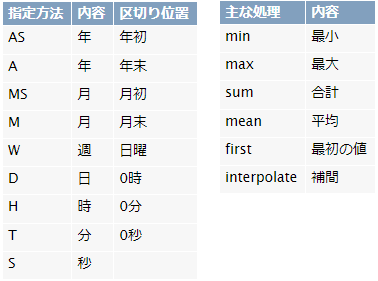

## 月ごとの平均値、最小値、最大値の集計
- 集計単位: M
- 処理: mean, min, max

In [ ]:
df_N225_M = df_N225["Close"].resample("M").agg(["mean", "max", "min"])

display(df_N225_M)

## n日ごとの平均値、最小値、最大値の集計
- 集計単位: nD (90日の場合：90D) 
- 処理: mean, min, max

In [ ]:
df_N225_90D = df_N225["Close"].resample("90D").agg(["mean", "max", "min"])

display(df_N225_90D)

## 曜日ごとの平均値、最小値、最大値の集計
- resampleを使えないため、pivot_tableを使用

In [ ]:
df_pivot = df_N225.pivot_table(index   = "day_name",            # 集計単位の列名
                               values  = "Close",               # 集計する列名
                               aggfunc = ["mean","max","min"],  # 集計方法
                               margins = True,                 # 合計の追加 
                               margins_name = "合計")          # 合計に使用する項目名
# 集計結果を出力
display(df_pivot) 

## 練習4

(1) 練習1で取得したデータで週単位の平均値、最小値、最大値を集計してみよう
- 集計単位: W
- 処理: mean, min, max

(2) 練習1で取得したデータで年単位の平均値、最小値、最大値を集計してみよう
- 集計単位: A
- 処理: mean, min, max

----

# 移動平均の分析

## 移動平均の計算
- 移動平均は、ある一定区間ごとの平均値を区間をずらしながら求めたもの。移動平均を用いてグラフを作成すると、長期的な傾向を表す滑らかな曲線が得られる
- 今回は、終値(Close)の5日平均（短期）、25日平均（中期）、50日平均（長期）を求める
- pandasの機能である`列名.rolling(window=日数).mean()`を利用

**日経平均の移動平均を計算**

In [ ]:
span_short  =  5 # 短期用の日数
span_midium = 25 # 中期用の日数
span_long   = 50 # 長期用の日数

# 移動平均の結果を代入
df_N225['sma_short']  = df_N225['Close'].rolling(window=span_short).mean()
df_N225['sma_midium'] = df_N225['Close'].rolling(window=span_midium).mean()
df_N225['sma_long']   = df_N225['Close'].rolling(window=span_long).mean()

display(df_N225.head(5)) # 先頭5行を表示
display(df_N225.tail(5)) # 末尾5行を表示

**移動平均の日数分のデータ集まった時に平均値が計算できるので、それまではNaN(欠損)となる**<Br>
**例えば、5日移動平均の場合、5日目から値が得られる**

## 移動平均のグラフ作成

In [ ]:
#------------------------------------------------------------------
# 設定項目
#------------------------------------------------------------------
name       = "日経平均"             # 銘柄名(任意の名前)
date       = df_N225.index          # インデックスの日時を取得
price      = df_N225['Close']       # 終値を取得
sma_short  = df_N225['sma_short']   # 5日移動平均を取得
sma_midium = df_N225['sma_midium']  # 25日移動平均を取得
sma_long   = df_N225['sma_long']    # 50日移動平均を取得
#------------------------------------------------------------------

# グラフ作成前に設定するオプション
plt.figure(figsize=(16, 4)) # 図のサイズ（横×縦）

# グラフ作成
# x軸、y軸、凡例タイトル、線幅、色
plt.plot(date, price,      label = name,               linewidth = 2, color = 'gray') 
plt.plot(date, sma_short,  label = '移動平均（短期）', linewidth = 1, color = 'red')
plt.plot(date, sma_midium, label = '移動平均（中期）', linewidth = 1, color = 'blue')
plt.plot(date, sma_long,   label = '移動平均（長期）', linewidth = 1, color = 'green')

# 追加オプション
plt.title(name,fontsize=15)         # グラフタイトル
plt.xlabel('日',fontsize=15)        # x軸ラベル
plt.ylabel('価格',fontsize=15)      # y軸ラベル
plt.xticks(fontsize=15)             # x軸の目盛文字サイズ
plt.yticks(fontsize=15)             # y軸の目盛文字サイズ
plt.legend(fontsize=15, loc="best") # 凡例
plt.grid()                          # 補助線追加

# 出力ファイル名を指定（Googleドライブの場合）
outfile = "drive/My Drive/Colab Notebooks/グラフ_"+name+"_移動平均.png"

# # 出力ファイル名を指定（Anacondaの場合, Google Colaboratoryの場合は削除してください)
outfile = "グラフ_"+name+"_移動平均.png"

plt.savefig(outfile, bbox_inches='tight')  # 画像の保存

plt.show()

## 結果の見方（売り買いの判断）
- ゴールデンクロス：短期移動平均が中期または長期平均を下から上に超えたとき「買い」
- デッドクロス：短期移動平均が中期または長期平均を上から下に超えたとき「売り」
- ゴールデンクロスやデットクロスの法則は、売買のタイミングの一例
<br><br>
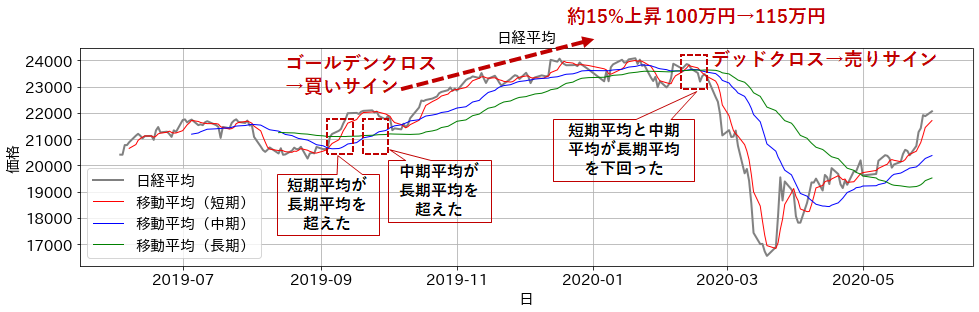

## 練習5
練習1で取得したデータの移動平均のグラフを書いてみよう。<br>
作成したグラフから、ゴールデンクロスやデットクロスがあるかを確かめてみよう。

----

# MACD（マックディー）の分析
- 時系列データの長期変動（トレンド）を見る指標で、売買シグナルとして用いられる
  - 0以上 → `上昇トレンド`
  - 0未満 → `下降トレンド`
  - 0ラインを超え始めたら   → `買い`
  - 0ラインを下回り始めたら → `売り`  
  - [参考:岡三オンライン](https://www.okasan-online.co.jp/jp_tools/use/stepup/08.html)
- 計算式
  - `MACD ＝ 短期EMA－長期EMA` (EMA:指数平滑移動平均)
  - `MACDシグナル ＝ MACDの移動平均線`

## MACDの計算
- 使用ライブラリ
  - `talib.MACD(データ, 短期移動平均の日数, 長期移動平均の日数, MACDシグナルの移動平均の日数)`を使用
  - 基本の設定値
     - 短期移動平均の日数:12
     - 長期移動平均の日数:26
     - MACDシグナルの移動平均の日数: 9

**日経平均のMACD**

In [ ]:
import talib

#------------------------------------------------------------------
# 設定項目
#------------------------------------------------------------------
price  = df_N225['Close'] # 終値を取得
#------------------------------------------------------------------

# 第1出力：MACD
# 第2出力：MACDシグナル
# 第3出力：MACDのヒストグラム作成用データ
macd, macdSig, macdHist = talib.MACD(price,        # 終値
                                  fastperiod=12,   # 短期の移動平均の日数
                                  slowperiod=26,   # 長期の移動平均の日数
                                  signalperiod=9   # MACDシグナルの移動平均の日数
                                 )

# pandasデータフレームに追加
df_N225['macd']     = macd
df_N225['macdSig']  = macdSig
df_N225['macdHist'] = macdHist

display(df_N225)

**MACDの計算には移動平均を使うため前半データはNaN(欠損)となる**

## MACDのグラフ作成

In [ ]:
#------------------------------------------------------------------
# 設定項目
#------------------------------------------------------------------
name   = "日経平均"           # 銘柄名(任意の名前)
date   = df_N225.index        # インデックスの日時を取得
price  = df_N225['Close']     # 終値を取得
macd   = df_N225['macdHist']  # macdの作図用データ
#------------------------------------------------------------------

#-------------------
# グラフ1：日経平均
#-------------------
# グラフサイズの変更
plt.figure(figsize=(16, 4)) 

# グラフ作成
plt.plot(date, price, label=name, linewidth=2, color="gray")

# 追加オプション
plt.title(name, fontsize=15)               # グラフタイトル
plt.xlabel('日', fontsize=15)              # x軸ラベル
plt.ylabel('価格', fontsize=15)            # y軸ラベル
plt.xticks(fontsize=15)                   # x軸の目盛文字サイズ
plt.yticks(fontsize=15)                   # x軸の目盛文字サイズ
plt.legend(fontsize=15, loc="upper left")  # 凡例
plt.grid()                                 # 補助線    
plt.show()

#-------------------
# グラフ2：MACD
#-------------------
# グラフサイズの変更
plt.figure(figsize=(16, 4)) 

# グラフ作成
plt.fill_between(date, macd, label='MACD', color='grey', alpha=0.5)

# 追加オプション
plt.title(name, fontsize=15)               # グラフタイトル
plt.xlabel("日", fontsize=15)              # x軸ラベル
plt.ylabel("MACD", fontsize=15)            # y軸ラベル
plt.xticks(fontsize=15)                   # x軸の目盛文字サイズ
plt.yticks(fontsize=15)                   # x軸の目盛文字サイズ
plt.legend(fontsize=15, loc="upper left")  # 凡例
plt.grid()                                 # 補助線    
plt.hlines(0, start, end, 'black', linestyles='dashed') # 水平線追加

# 出力ファイル名を指定（Googleドライブの場合）
outfile = "drive/My Drive/Colab Notebooks/グラフ_"+name+"_MACD.png"

# 出力ファイル名を指定（Anacondaの場合, Google Colaboratoryの場合は削除してください)
outfile = "グラフ_"+name+"_MACD.png"

plt.savefig(outfile, bbox_inches='tight')  # 画像の保存

plt.show()

## 結果の見方（売り買いの判断）
- 0以上 → `上昇トレンド`
- 0未満 → `下降トレンド`
- 0ラインを超え始めたら   → `買い`
- 0ラインを下回り始めたら → `売り`<br>
実際の株トレーダーはもう少し複雑な分析を行って判断しているので興味のある方は調べてください

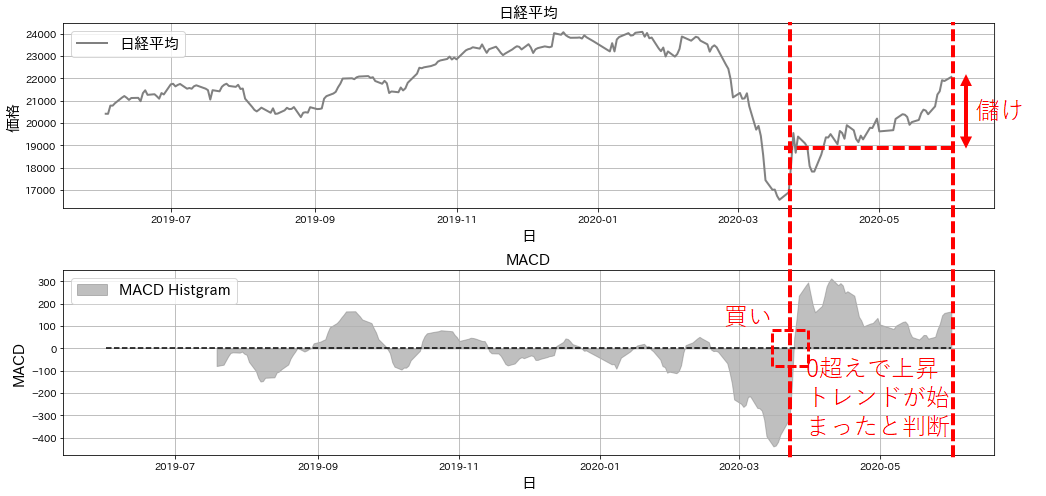

## 練習6
練習1で取得したデータのMACDのグラフを書いてみよう。グラフから、買いのタイミングがあるかを確かめてみよう。

----

# RSIの分析
- 買われ過ぎ、売られ過ぎの指標
  - 20-30%を下回る → `売られすぎ` → 逆張りの`買い`
  - 70-80%を上回る → `買われすぎ` → 逆張りの`売り`
  - [参考:岡三オンライン](https://www.okasan-online.co.jp/tradeinfo/technical-analytics/articles/15_RSI/)

## RSIの計算
- 使用ライブラリ
  - `RSI = talib.RSI(データ, timeperiod=何日間のRSIを計算するか)`を使用

**日経平均のRSI**

In [ ]:
#------------------------------------------------------------------
# 設定項目
#------------------------------------------------------------------
price  = df_N225['Close']        # 終値を取得
#------------------------------------------------------------------

# RSI計算
RSI = talib.RSI(price,           # 終値
                timeperiod = 14  # 何日間のRSIを計算するかの日数（14日が適しているとの言われている）
               )

# pandasデータフレームに追加
df_N225['RSI'] = RSI 

display(df_N225)

## RSIのグラフ作成

In [ ]:
#------------------------------------------------------------------
# 設定項目
#------------------------------------------------------------------
name  = "日経平均"      # 銘柄名(任意の名前)
date  = df_N225.index    # 行名の日時を取得
price = df_N225['Close'] # 終値を取得
rsi   = df_N225['RSI']   # RSI取得
#------------------------------------------------------------------

# グラフ描画枠作成（２つのグラフを並べるキャンパスを設定）
fig = plt.figure(figsize=(14, 7), tight_layout=True) 

#-------------------
# グラフ1：日経平均
#-------------------
# グラフサイズの変更
plt.figure(figsize=(16, 4)) 

# グラフ作成
plt.plot(date, price, label=name, linewidth=2, color="gray")

# 追加オプション
plt.title(name, fontsize=15)         # グラフタイトル
plt.xlabel("日", fontsize=15)              # x軸ラベル
plt.ylabel("価格", fontsize=15)            # y軸ラベル
plt.xticks(fontsize=15)                   # x軸の目盛文字サイズ
plt.yticks(fontsize=15)                   # x軸の目盛文字サイズ
plt.legend(fontsize=15, loc="upper left")  # 凡例
plt.grid()                                 # 補助線    
plt.show()                                 

#----------------
# # グラフ2: RSI
#----------------
# グラフサイズの変更
plt.figure(figsize=(16, 4)) 

# グラフ作成
plt.plot(date, rsi, label='RSI', linewidth=2, color='gray')

#　追加オプション
plt.title(name,fontsize=15)              # グラフタイトル
plt.xlabel('日',fontsize=15)              # x軸ラベル
plt.ylabel('RSI', fontsize=15)            # y軸ラベル
plt.xticks(fontsize=15)                   # x軸の目盛文字サイズ
plt.yticks(fontsize=15)                   # x軸の目盛文字サイズ
plt.legend(fontsize=15, loc="best")       # 凡例
plt.grid()                                # 補助線追加
plt.hlines([30,50,70], start, end, 'blue', linestyles='dashed') # 30,50,70%ラインに水平線追加

# 出力ファイル名を指定（Googleドライブの場合）
outfile = "drive/My Drive/Colab Notebooks/グラフ_"+name+"_RSI.png"

# 出力ファイル名を指定（Anacondaの場合, Google Colaboratoryの場合は削除してください)
outfile = "グラフ_"+name+"_RSI.png"

plt.savefig(outfile, bbox_inches='tight')  # 画像の保存

plt.show()

## 結果の見方
- 20-30%を下回る → `売られすぎ` → 逆張りの`買い`
- 70-80%を上回る → `買われすぎ` → 逆張りの`売り`<br>
実際の株トレーダーはもう少し複雑な分析を行って判断しているので興味のある方は調べてください

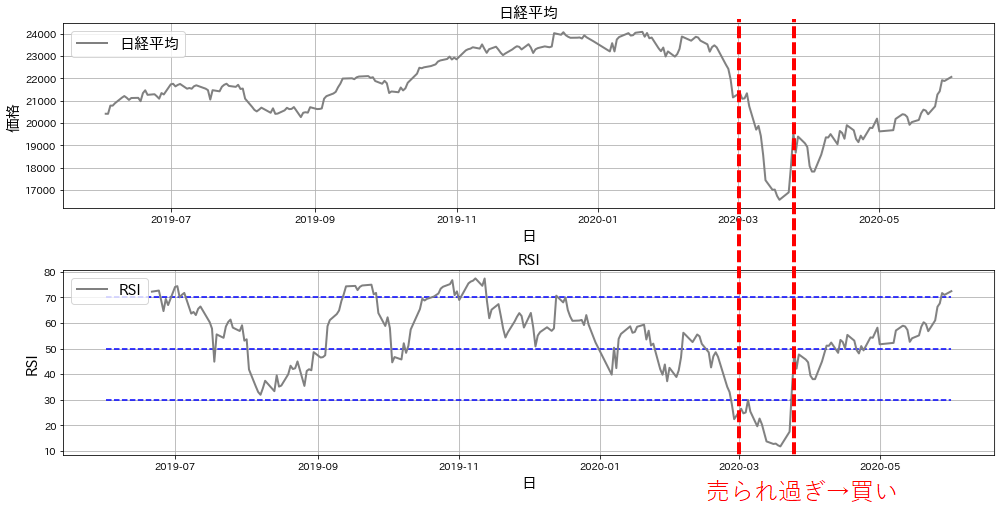

## 練習7
練習1で取得したデータのRSIのグラフを書いてみよう。グラフから、買われ過ぎまたは売られ過ぎのサインがあるかを確かめてみよう。

----

# ボリンジャーバンドの分析
- 移動平均などの一定期間の平均に対して、一定期間の標準偏差を足したものと引いたもの
- 買われ過ぎ、売られ過ぎの判断に用いられる
- 一般に上限下限は±2σを使う（σ:標準偏差）→ 統計的95%はその範囲に価格が入るということ
  - 終値が+2σを超える → `買われすぎ`
  - 終値が-2σを超える → `売られすぎ`
  - [参考:岡三オンライン](https://www.okasan-online.co.jp/tradeinfo/technical-analytics/articles/7_band/)

## ボリンジャーバンドの計算
- 使用ライブラリ
  - `上限値、移動平均、下限値 = talib.BBANDS（データ, 平均と標準偏差を計算するための日数, 上限を何σにするか、下限を何σにするか, 移動平均のタイプ)`
  - 移動平均のタイプ：matype
    - 0：単純移動平均
    - 1：指数移動平均
    - 2：加重移動平均

**日経平均のボリンジャーバンド**

In [ ]:
#------------------------------------------------------------------
# 設定項目
#------------------------------------------------------------------
price  = df_N225['Close']        # 終値を取得
#------------------------------------------------------------------

upper, middle, lower = talib.BBANDS(price,         # 終値, 
                                 timeperiod = 25,  # 移動平均日数(平均と標準偏差を計算するための日数)
                                 nbdevup = 2,      # 上限をσ(標準偏差)の何倍にするか
                                 nbdevdn = 2,      # 下限をσ(標準偏差)の何倍にするか
                                 matype  = 0       # 単純移動平均
                                )
# pandasデータフレームに追加
df_N225['upper']  = upper
df_N225['middle'] = middle
df_N225['lower']  = lower

display(df_N225)

## ボリンジャーバンドのグラフ作成

In [ ]:
#------------------------------------------------------------------
# 設定項目
#------------------------------------------------------------------
name   = "日経平均"        # 銘柄名(任意の名前)
date   = df_N225.index     # インデックスの日時を取得
price  = df_N225['Close']  # 終値を取得
upper  = df_N225['upper']  # 上限値
middle = df_N225['middle'] # 移動平均
lower  = df_N225['lower']  # 下限値
#------------------------------------------------------------------

# グラフ描画枠作成（２つのグラフを並べるキャンパスを設定）
fig = plt.figure(figsize=(14, 7), tight_layout=True) 

# グラフ作成前に設定するオプション
plt.figure(figsize=(16, 4)) # 図のサイズ（横×縦）

# グラフ作成
# x軸、y軸、凡例タイトル、線幅
plt.plot(date, price,  label=name, linewidth = 2, color = 'gray') # 日経平均 
plt.plot(date, middle, label='移動平均', linewidth = 1, color = 'red')  # 移動平均
plt.fill_between(date, upper, lower, color='green', alpha=0.2)          # ボリンジャーバンド

# 追加オプション
plt.title(name,fontsize=15)               # グラフタイトル
plt.xlabel('日',fontsize=15)              # x軸ラベル
plt.ylabel('価格',fontsize=15)            # y軸ラベル
plt.xticks(fontsize=15)                   # x軸の目盛文字サイズ
plt.yticks(fontsize=15)                   # x軸の目盛文字サイズ
plt.legend(fontsize=15, loc="best") # 凡例
plt.grid()                                # 補助線追加

# 出力ファイル名を指定（Googleドライブの場合）
outfile = "drive/My Drive/Colab Notebooks/グラフ_"+name+"_ボリンジャーバンド.png"

# 出力ファイル名を指定（Anacondaの場合, Google Colaboratoryの場合は削除してください)
outfile = "グラフ_"+name+"_ボリンジャーバンド.png" 

plt.savefig(outfile, bbox_inches='tight')  # 画像の保存

plt.show()

## 結果の見方
- 終値が+2σを超える → `買われすぎ`
- 終値が-2σを超える → `売られすぎ`<br>
実際の株トレーダーはもう少し複雑な分析を行って判断しているので興味のある方は調べてください

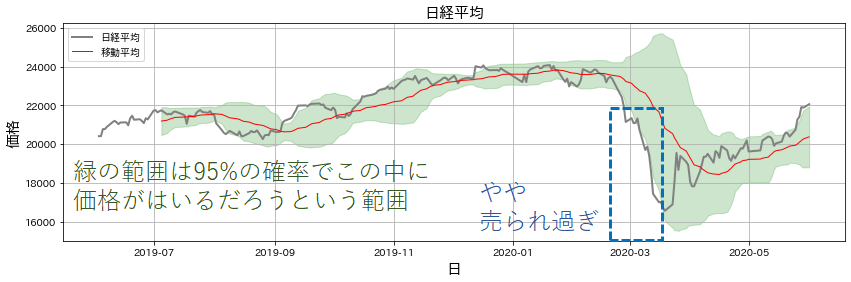

## 練習8
練習1で取得したデータのボリンジャーバンドのグラフを書いてみよう。グラフから、買われ過ぎまたは売られ過ぎのサインがあるかを確かめてみよう。

# 様々な指標を追加したデータフレームのファイル出力

**日経平均のデーターフレームをExcelファイルに出力**

In [ ]:
# 日経平均のデータフレーム`df_N225`を出力
# indexは時系列情報が入っているため出力

# 出力ファイル名を指定（Googleドライブの場合）
outfile = "drive/My Drive/Colab Notebooks/日経平均_分析結果.xlsx"

# 出力ファイル名を指定（Anacondaの場合, Google Colaboratoryの場合は削除してください)
outfile =  "日経平均_分析結果.xlsx"

# 出力
df_N225.to_excel(outfile, sheet_name="日経平均_分析結果")

## 練習9
練習1で作成したデータフレームの結果を`日経平均_分析結果.xlsx`にファイルに出力してみよう

----

# [参考] 将来予測
- 使用ライブラリ：`prophet`
- データフレームではデータの変数名を以下のように設定
  - Prophetで扱う時間データ: `ds`
  - 日経平均株価の調整済み終値(Adj Close): `y`

## 予測用データ作成
- 今回は、`2017-08-01`から`2022-07-31`の5年間の日経平均のデータから、その先1年後までを予測する

In [ ]:
from   pandas_datareader import data
import pandas as pd
import datetime as dt # 日付型データ生成

#------------------------------------------------------------------
# 設定項目：DataReaderの引数
#------------------------------------------------------------------
code  = "^NKX"            # 銘柄コード
site  = "stooq"           # データ取得サイト
start = dt.date(2017,8,1) # 開始(年, 月, 日) 
end   = dt.date(2022,7,31) # 終了(年, 月, 日) 　
#------------------------------------------------------------------

# 新規データフレーム(df_prophet)にデータを挿入
df_prophet = data.DataReader(code, site, start, end).sort_index()  

# 曜日の追加
df_prophet["day_name"] = df_prophet.index.day_name()

# Prophetによる予測データを作成
df_prophet = df_prophet.reset_index() # indexの日時をデータ列に設定
df_prophet.rename(columns={'Date':'ds'}, inplace=True) # 列名のDateをdsに変更
df_prophet.rename(columns={'Close':'y'}, inplace=True) # 列名のCloseをyに変更

display(df_prophet.head(5)) # 5行分データ表示

## 予測モデル作成

In [ ]:
from prophet import Prophet # ライブラリ読み込み

# 予測モデルの準備
model = Prophet(daily_seasonality=True) 

# データを予測モデルにフィット
model.fit(df_prophet)

## 予測する期間を指定して予測
- 1行目: 予測期間設定
  - モデル名.make_future_dataframe(periods=予測期間, freq = 予測単位)
      - 予測期間: 365日先の場合 365
      - 予測単位: 日単位の場合 'd'
- 2行目: 土日の予測を除外(株価は土日は動かないため)  
  - dt.weekdayにより、月0, 火1, 水2, 木3, 金4, 土5, 日6
- 3行目: データを挿入して予測
  - モデル名.predict(データ)
- 4行目: 予測結果の可視化  

In [ ]:
# 予測期間設定(365日の将来を予測)
future_data = model.make_future_dataframe(periods=365, freq = 'd')
#display(future_data)

# 土日の予測を除外(株価は土日は動かないため)  
future_data = future_data[future_data['ds'].dt.weekday < 5]
#display(future_data)

# データを挿入して予測
forecast_data = model.predict(future_data)
display(forecast_data)

# 時系列グラフ作成
fig = model.plot(forecast_data)

青の実線が予測値、水色の範囲は誤差範囲（95%信頼区間）

予測精度を上げるためには株価そのものではく、データを対数変換したり、Prophetのパラメータを調整するなどが必要

----